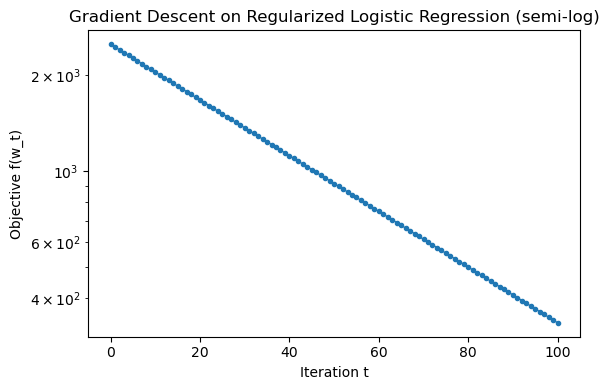

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Problem 4(e): simulation + GD
# -----------------------------
rng = np.random.default_rng(0)

# Settings
d = 50
n = 100
lambda0 = 1.0
L = 100.0
eta = 1.0 / L
T = 100  # first 100 iterations

# (a) w_opt = (1,...,1)
w_opt = np.ones(d)

# (b) X ~ N(0,1) iid
X = rng.standard_normal((n, d))

# (c) z = X w_opt, p_i = sigmoid(z_i)
z = X @ w_opt
p = 1.0 / (1.0 + np.exp(-z))  # sigmoid

# (d) y_i in {±1}, P(y_i = 1) = p_i
y = (rng.random(n) < p).astype(float)  # 0/1
y = 2.0 * y - 1.0  # -> -1/+1

# Initial w0 = (10,...,10)
w = 10.0 * np.ones(d)

def sigmoid(t):
    return 1.0 / (1.0 + np.exp(-t))

def f_obj(w):
    """Objective: mean logistic loss with y in {±1} + (lambda0/2)||w||^2."""
    a = y * (X @ w)                        # a_i = y_i x_i^T w
    loss = np.logaddexp(0.0, -a).mean()    # log(1 + exp(-a_i)) averaged
    reg = 0.5 * lambda0 * np.dot(w, w)
    return loss + reg

def grad_f(w):
    """Gradient of f(w)."""
    a = y * (X @ w)
    s = sigmoid(-a)                         # s_i = sigma(-a_i)
    # grad loss = -(1/n) sum y_i x_i sigma(-a_i)
    grad_loss = -(X.T @ (y * s)) / n
    grad_reg = lambda0 * w
    return grad_loss + grad_reg

# Run GD and record objective values
vals = np.empty(T + 1)
vals[0] = f_obj(w)

for t in range(1, T + 1):
    w = w - eta * grad_f(w)
    vals[t] = f_obj(w)

# Semi-log plot of f(w_t) for first 100 iterations
plt.figure(figsize=(6, 4))
plt.plot(np.arange(T + 1), vals, marker="o", markersize=3, linewidth=1)
plt.yscale("log")
plt.xlabel("Iteration t")
plt.ylabel("Objective f(w_t)")
plt.title("Gradient Descent on Regularized Logistic Regression (semi-log)")
plt.tight_layout()
plt.show()
